# Making Plots from CNN I3 File of ML Classified Events
## By Elizabeth Warrick
### Description:
This is the cleaned up python notebook showing all the different histograms and plots I made to show the different predictions of categories for neutrino events. 

### Key of Plots:
(1) -- Histogram showing what category of event the ML algorithm predicted as being most likely. 

(2a) -- Scatter plot of the categories for each event's overall maximum prediction score (pink) and for events whose maximum prediction score is less than 60%*.

(2b) -- Ratio between events with maximum prediction less than 60%* and overall maximum prediction score. 

\* = value we are comparing to, number is subject to change.

In [1]:
#import necessary packages
import tables
from tables import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
#Take hdf5 table made from desired keys of original i3 file and open it
#Note: to see how hdf5 was made, refer to /home/icecube/Desktop/eliz_zooniverse/book.py
file = tables.open_file('test.hd5')
file.root #shows different tables within file
preds = file.root.ml_suite_classification.cols[:] #table of all classification values; includes runtime, etc. 
print("Total Number of Events:",len(preds))

Total Number of Events: 8545


In [9]:
#Selecting prediction values for each category of all the events
pred_00 = file.root.ml_suite_classification.cols.prediction_0000[:]
pred_01 = file.root.ml_suite_classification.cols.prediction_0001[:]
pred_02 = file.root.ml_suite_classification.cols.prediction_0002[:]
pred_03 = file.root.ml_suite_classification.cols.prediction_0003[:]
pred_04 = file.root.ml_suite_classification.cols.prediction_0004[:]
#stacking all the predictions to make a new array of just the prediction values for each event. axis0 is event number, axis1 is category.
p2=np.vstack((pred_00,pred_01,pred_02,pred_03,pred_04))
#get the index of the maximum prediction value for each event, from above array p2. Produces which category the max value is in. 
predvals=np.argmax(p2, axis=0)

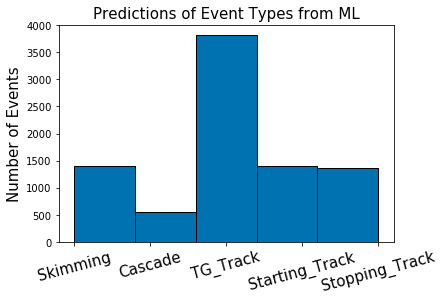

In [23]:
#Making plain histogram of the max prediction category for each event. 
plt.figure(facecolor='white')
plt.style.use('seaborn-colorblind')
plt.hist(predvals,bins=5, histtype='bar', edgecolor='black') #uses predvals because we only want the max category. 
my_xticks = ['Skimming','Cascade','Through_Going_Track','Starting_Track','Stopping_Track']
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks([0,1,2,3,4],['Skimming','Cascade','TG_Track','Starting_Track','Stopping_Track'],rotation=15,fontsize=15)
plt.title('Predictions of Event Types from ML', fontsize=15)
plt.ylabel('Number of Events', fontsize=15)
plt.show()

In [24]:
#Turn p2 array into data frame
df = pd.DataFrame(p2.T)
value= 0.6 #the prediction value we will be comparing to, sometimes referred to as comparable.  
score= df.max(axis=1) #value of max prediction
mask = (score < value) #mask for values to get any value where the value of the score of the event is less than the desired comparable value. 
max_indices = df.idxmax(axis=1) #index of max value prediction
score_arr = score[mask] #array of score values whose values are less than comparable value. 
index_arr = max_indices[mask] #iarray of indices of max values where mask condition is satisfied. 

#initialize empty lists
a=[] #array of values that will be the total number of times a max value is satisfied by the mask. 
b=[] #all max values regardless of whether or not they are comparable to mask. 
for i in range(0,5):
    a.append(len(index_arr[index_arr==i])) #appends how many times a max val is satisfied by mask. 
    b.append(len(max_indices[max_indices==i])) #appends how many times a max val appears

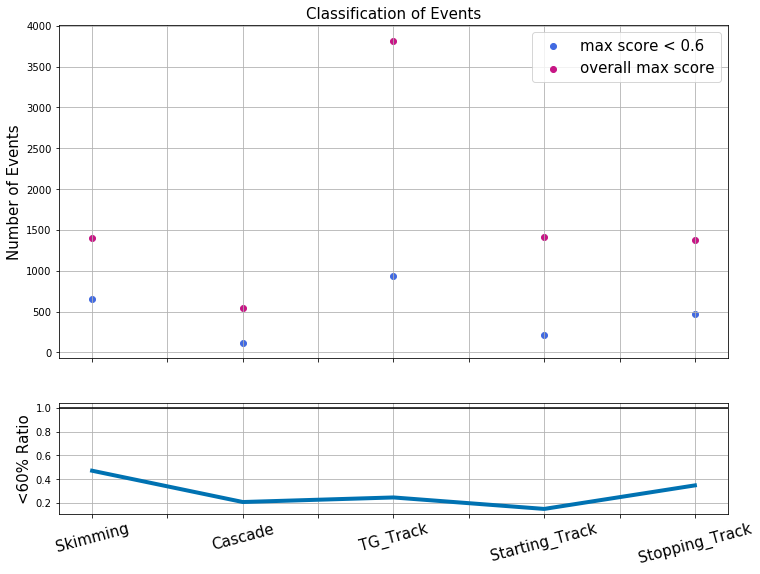

In [25]:
#Plot Comparing True max predictions with max predictions whose values are less than comparable value. 

#set up subplot
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9), gridspec_kw = {'height_ratios':[3, 1]}, sharex = True) #where sharex means share x labels/axis

#subplot1: scatter plot of how many events have max prediction (or prediction value of comparable) of specific categories
ax1.scatter(np.arange(0,5),a, label = 'max score < 0.6', color = 'royalblue')
ax1.scatter(np.arange(0,5),b ,label = "overall max score", color = "mediumvioletred")
ax1.set_ylabel('Number of Events', fontsize=15)
ax1.legend(fontsize=15)
ax1.grid(True)
ax1.set_title('Classification of Events', fontsize=15)
ax1.patch.set_facecolor('white')
ax1.set_xticks = ([0,1,2,3,4])

#subplot2: ratio of events in each catagory satisfied by mask compared to overall number of max event type prediction
ax2.set_xticklabels(['','Skimming',"",'Cascade',"",'TG_Track',"",'Starting_Track',"",'Stopping_Track'], ha="center",fontsize=15) #havev to put empty label between each desired label to have them print with proper spacing. 
ax2.plot(np.arange(0,5), np.divide(a,b), lw = 4) #plots ratio line, lw is linewidth
ax2.set_xticks = ([0,1,2,3,4]) #sets x tick marks for second subplot
ax2.axhline(y=1.0, color='black') #labels y axis line y=1, like 100%
ax2.grid(True) 
ax2.set_ylabel('<60% Ratio',fontsize=15)
ax2.tick_params(axis='x', labelrotation=15)

fig.patch.set_facecolor('white')
plt.show()